# Library Imports


In [118]:
!pip show scikit-learn 

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick


In [229]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, QuantileRegressor, Lasso, ElasticNet, PoissonRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from warnings import simplefilter
from sklearn.metrics import r2_score,mean_squared_error
simplefilter("ignore", category=ConvergenceWarning)
import warnings
import joblib
from xgboost import plot_importance

# Data Loading & EDA

In [58]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [310]:
AENERGY=pd.read_csv("/content/gdrive/MyDrive/CE802_P3_Data.csv")

In [60]:
len(AENERGY)

1500

In [61]:
AENERGY.describe(include='all')

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very low,NaN,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307,NaN,NaN,NaN,NaN,NaN,NaN,393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,847.011520,-11736.908600,-236.076500,24903.095547,569.654240,-13.881793,1701.127373,10.154180,-15.809880,-55.084673,3.969333,1110.544520,-486.879220,-13.857060,11.494480,44.098320,14.209387,-22925.39096,-470.113987,NaN,-322.213347,233.007000,147.677373,-135.210200,-28968.562200,-112.058327,NaN,-116.321787,7402.949867,7.954667,-12.847560,-397.265347,-57.938820,-1636.51510,5.444893,3598.854547,856.493547
std,595.115533,9055.633907,299.256174,5930.199404,129.856996,4.227795,591.284001,4.214935,82.215588,29.895706,1.829378,289.526864,126.902301,8.373293,8.019788,12.997569,4.327923,8765.70927,293.951559,NaN,82.371292,60.705946,1407.814521,87.979299,9210.333946,30.026542,NaN,41.155295,5949.554732,3.511623,44.360757,433.264391,12.475389,921.61161,5.969597,845.754592,1222.860406
min,-1271.540000,-43559.910000,-1466.300000,4409.780000,24.180000,-35.660000,34.980000,-8.260000,-398.680000,-152.810000,0.000000,-315.850000,-1167.000000,-54.060000,0.090000,-14.760000,-9.420000,-49099.50000,-1566.030000,NaN,-721.120000,42.400000,0.000000,-419.400000,-56492.130000,-215.710000,NaN,-310.520000,-9729.680000,0.000000,-271.950000,-2440.880000,-112.020000,-4215.09000,-17.040000,-1023.920000,-2685.920000
25%,441.435000,-17835.667500,-430.190000,20806.395000,501.300000,-15.887500,1297.590000,8.050000,-57.015000,-75.012500,3.000000,915.850000,-548.692500,-17.415000,5.610000,37.860000,12.270000,-28746.44250,-665.242500,NaN,-366.540000,190.425000,0.280000,-197.047500,-35313.847500,-132.032500,NaN,-137.115000,3548.705000,6.000000,-33.357500,-618.370000,-64.650000,-2263.79250,1.595000,3188.555000,17.235000
50%,858.350000,-11634.240000,-236.735000,25064.170000,567.705000,-13.905000,1716.700000,10.180000,-16.330000,-55.550000,4.000000,1120.685000,-485.745000,-11.880000,9.795000,44.100000,14.310000,-22964.47500,-462.950000,NaN,-322.990000,234.150000,2.170000,-133.350000,-28771.755000,-111.760000,NaN,-116.610000,7472.750000,8.000000,-13.585000,-388.210000,-58.260000,-1655.11500,5.390000,3611.660000,624.735000
75%,1249.025000,-5991.990000,-40.250000,28904.100000,633.570000,-11.835000,2095.695000,12.155000,25.970000,-35.190000,5.000000,1299.660000,-422.947500,-7.822500,15.300000,50.220000,16.390000,-17054.41500,-284.397500,NaN,-281.670000,271.940000,15.965000,-77.332500,-22766.115000,-91.200000,NaN,-96.100000,11456.320000,10.000000,8.727500,-182.065000,-51.390000,-1013.64750,9.585000,4009.675000,1609.167500


In [62]:
AENERGY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   int64  
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   object 
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [63]:
AENERGY.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,854.04,-15267.84,193.04,12132.20,464.22,-19.81,920.42,11.84,-38.02,8.35,2,952.53,-554.22,-4.53,7.20,46.17,13.98,-37437.78,-583.34,Low,-368.48,319.02,41.26,-277.38,-31539.90,-115.92,Rest,-100.43,10497.32,8,-46.22,91.89,-41.70,-849.78,-5.12,4261.68,609.09
1,1748.76,-4299.45,439.72,18046.14,540.36,-8.55,1913.78,11.28,122.02,-8.83,0,1122.94,-614.49,-8.10,14.70,37.59,17.05,-15121.95,-632.16,Very low,-556.62,76.50,1.10,-88.98,-25532.67,-144.67,USA,-97.41,16792.88,4,51.24,-450.34,-75.30,-1801.59,-0.16,2737.58,232.66
2,834.44,-18927.93,-85.86,18533.56,611.34,-15.88,1956.90,10.00,-24.26,-54.33,3,1077.86,-597.09,-8.64,20.25,36.24,15.94,-3659.73,41.96,High,-275.04,161.22,1.56,-124.14,-12582.51,-131.97,Rest,-135.59,-5647.94,6,40.93,-471.02,-55.50,-2529.75,8.50,3696.64,480.01
3,1429.36,3653.73,-59.69,31314.52,408.45,-9.67,1628.18,11.59,90.88,-38.87,5,844.83,-360.90,-18.66,7.86,48.15,15.58,-36495.27,-190.68,Very high,-445.08,202.50,24.40,-324.36,-30341.70,-91.75,USA,-85.77,6869.46,2,-9.19,-290.45,-67.86,-2915.34,9.76,2919.54,1685.20
4,188.80,-3932.07,128.70,22837.34,530.22,-14.93,1218.16,9.55,-93.78,-61.95,4,1355.60,-648.63,-8.52,16.38,39.24,6.32,-20724.51,-822.35,High,-297.98,284.46,2.54,-179.91,-22865.49,-108.92,Rest,-75.76,16974.08,2,100.86,-850.10,-64.95,-2154.12,13.42,2693.48,617.96
5,1602.80,-10519.38,-171.15,27837.94,691.86,-12.53,1801.42,12.01,77.56,-55.78,5,918.37,-491.10,-17.31,15.96,45.24,11.76,-15998.55,-313.70,Low,-344.08,245.62,20.58,-109.02,-38477.79,-139.13,Europe,-97.40,14982.20,8,27.07,-318.71,-34.02,-1213.29,12.02,3054.40,632.93
6,2769.66,3712.02,-572.38,27608.68,148.41,-14.68,2128.78,9.85,39.66,-103.49,3,1626.53,-504.33,-11.88,3.09,54.75,18.48,-18389.31,-521.05,Very low,-336.58,314.16,0.08,-138.03,-28609.38,-114.57,Europe,-97.26,1395.68,10,-3.54,-518.08,-52.50,-1802.52,-8.64,4965.36,-397.56
7,-182.60,-3632.97,-395.90,24498.58,576.48,-6.34,1718.56,6.00,24.10,-53.97,4,607.18,-438.87,-32.46,16.86,45.21,14.12,-17313.66,-629.98,Very high,-313.08,220.80,2.52,-271.83,-34148.04,-88.09,UK,-93.26,9556.62,6,-14.74,-323.35,-62.61,-1853.46,2.92,4535.78,652.43
8,2050.82,4715.52,-351.56,23770.56,584.22,-9.63,1925.40,15.82,-25.94,-89.26,3,1069.15,-519.75,-9.09,6.60,37.71,14.95,-29263.53,-626.94,Medium,-312.28,165.40,0.14,-114.69,-30164.88,-70.66,USA,-74.51,13830.26,12,-42.24,-711.75,-83.40,-870.96,12.42,5772.38,425.97
9,1233.26,-17861.43,-1247.48,29122.66,716.58,-15.64,1298.58,6.95,97.58,-76.94,5,1218.19,-552.81,-21.51,22.32,51.06,10.81,-18941.16,-156.21,Low,-315.74,240.78,43.34,72.81,-33268.86,-129.31,USA,-148.60,14656.34,12,-23.45,-681.06,-42.96,-1007.49,14.60,3505.52,1373.65


## Feature Histograms; Distribution Understanding

From what is present above, we can understand a few things right away;


*   Need for dummy variables to reduce the categorical columns to 0-1
*   But for variables like low,med,high,very-high, we should convert in 0,1,2,3 way
*   Normalization!



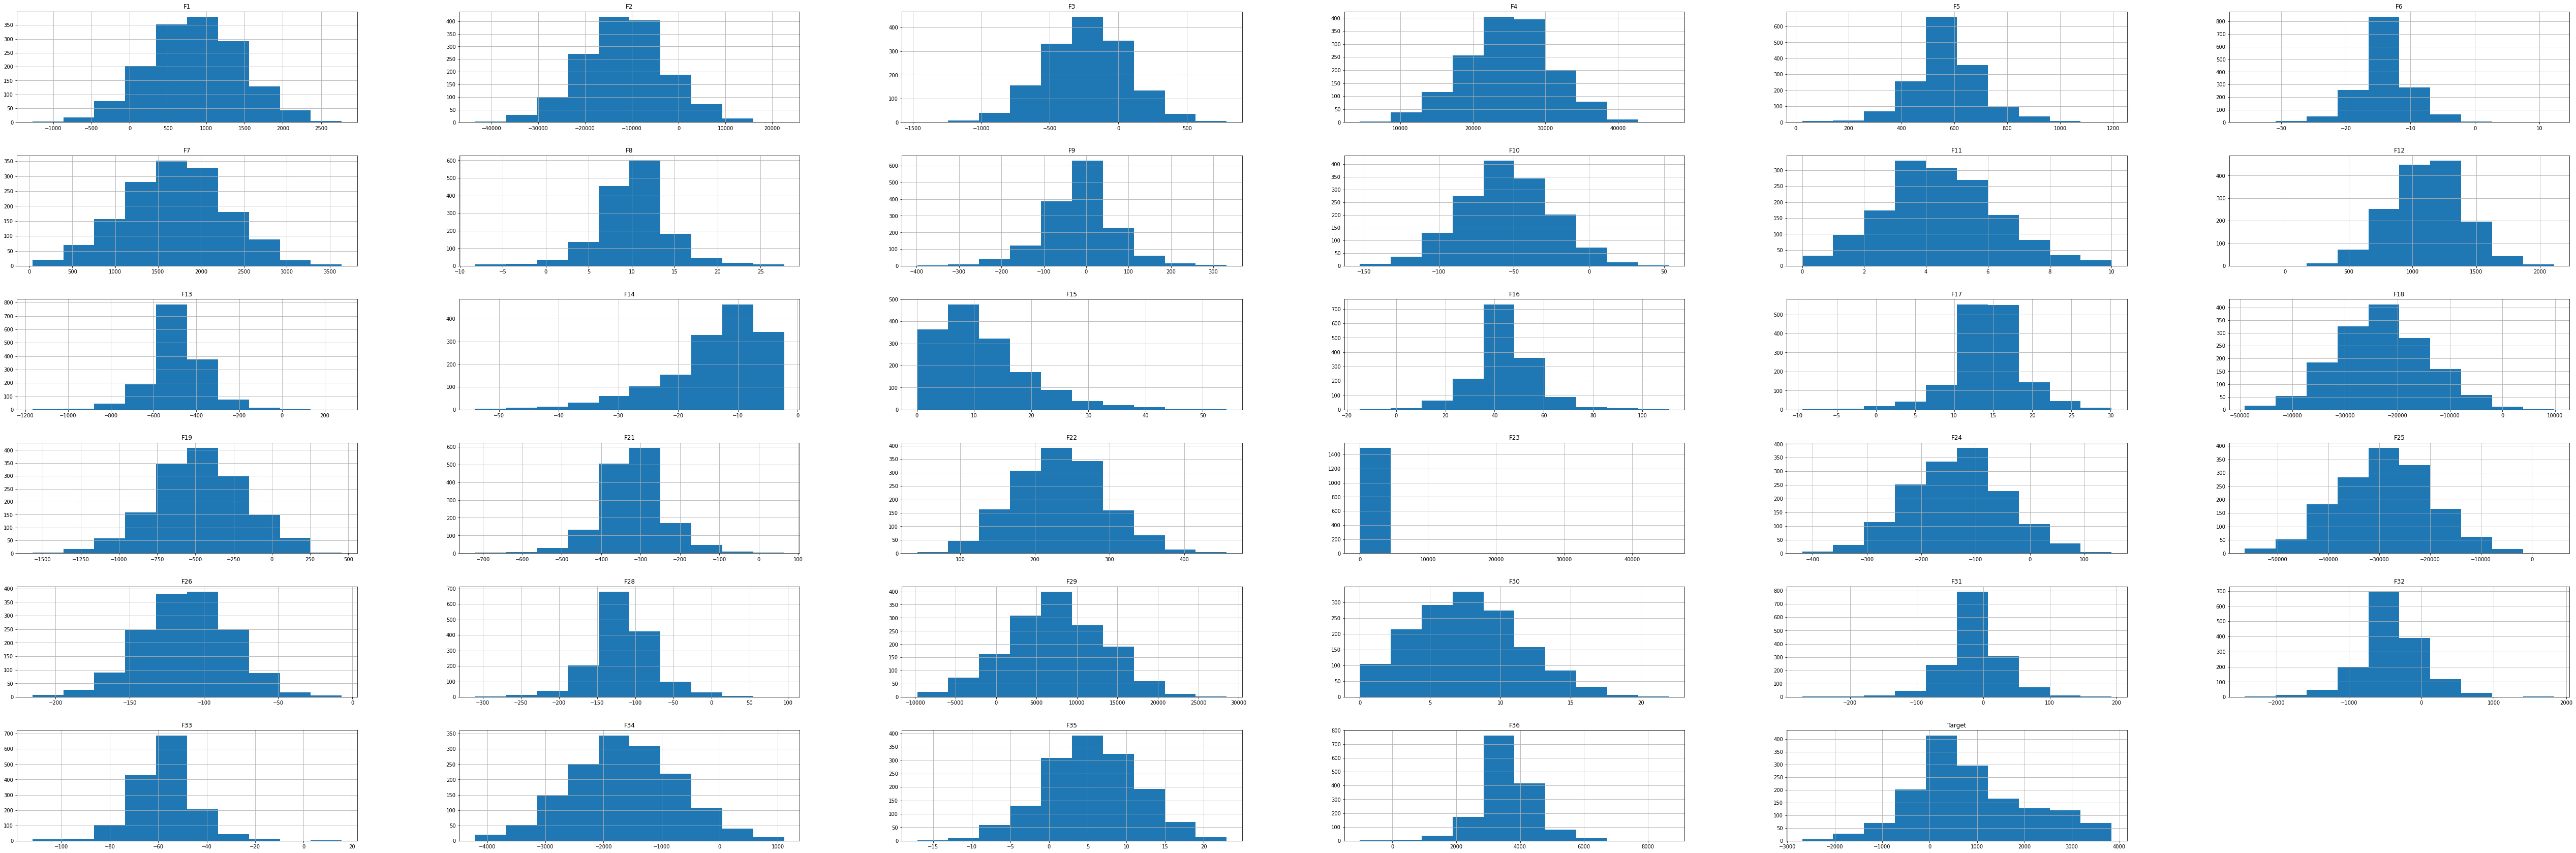

In [64]:
AENERGY.hist(figsize = (90,30))
plt.show()

## Feature Engineering

In [311]:
AENERGY = AENERGY.replace({'F20': {'Very low':0, 'Low': 1, 'Medium': 2, 'High':3, 'Very high':4}})
AENERGY = pd.get_dummies(AENERGY, columns=['F27'])

In [66]:
AENERGY.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target,F27_Europe,F27_Rest,F27_UK,F27_USA
0,854.04,-15267.84,193.04,12132.20,464.22,-19.81,920.42,11.84,-38.02,8.35,2,952.53,-554.22,-4.53,7.20,46.17,13.98,-37437.78,-583.34,1,-368.48,319.02,41.26,-277.38,-31539.90,-115.92,-100.43,10497.32,8,-46.22,91.89,-41.70,-849.78,-5.12,4261.68,609.09,0,1,0,0
1,1748.76,-4299.45,439.72,18046.14,540.36,-8.55,1913.78,11.28,122.02,-8.83,0,1122.94,-614.49,-8.10,14.70,37.59,17.05,-15121.95,-632.16,0,-556.62,76.50,1.10,-88.98,-25532.67,-144.67,-97.41,16792.88,4,51.24,-450.34,-75.30,-1801.59,-0.16,2737.58,232.66,0,0,0,1
2,834.44,-18927.93,-85.86,18533.56,611.34,-15.88,1956.90,10.00,-24.26,-54.33,3,1077.86,-597.09,-8.64,20.25,36.24,15.94,-3659.73,41.96,3,-275.04,161.22,1.56,-124.14,-12582.51,-131.97,-135.59,-5647.94,6,40.93,-471.02,-55.50,-2529.75,8.50,3696.64,480.01,0,1,0,0
3,1429.36,3653.73,-59.69,31314.52,408.45,-9.67,1628.18,11.59,90.88,-38.87,5,844.83,-360.90,-18.66,7.86,48.15,15.58,-36495.27,-190.68,4,-445.08,202.50,24.40,-324.36,-30341.70,-91.75,-85.77,6869.46,2,-9.19,-290.45,-67.86,-2915.34,9.76,2919.54,1685.20,0,0,0,1
4,188.80,-3932.07,128.70,22837.34,530.22,-14.93,1218.16,9.55,-93.78,-61.95,4,1355.60,-648.63,-8.52,16.38,39.24,6.32,-20724.51,-822.35,3,-297.98,284.46,2.54,-179.91,-22865.49,-108.92,-75.76,16974.08,2,100.86,-850.10,-64.95,-2154.12,13.42,2693.48,617.96,0,1,0,0


## Checking for Outliers

We see noticeable presence of outliers in a lot of features like F11, F23, F25, but it would be good to visualize this again after normalization.
We already could see this coming after we described the dataframe above with means and max moving in polar opposite directions for some of the features like F2 (Mean: -11K, Max: 22K)

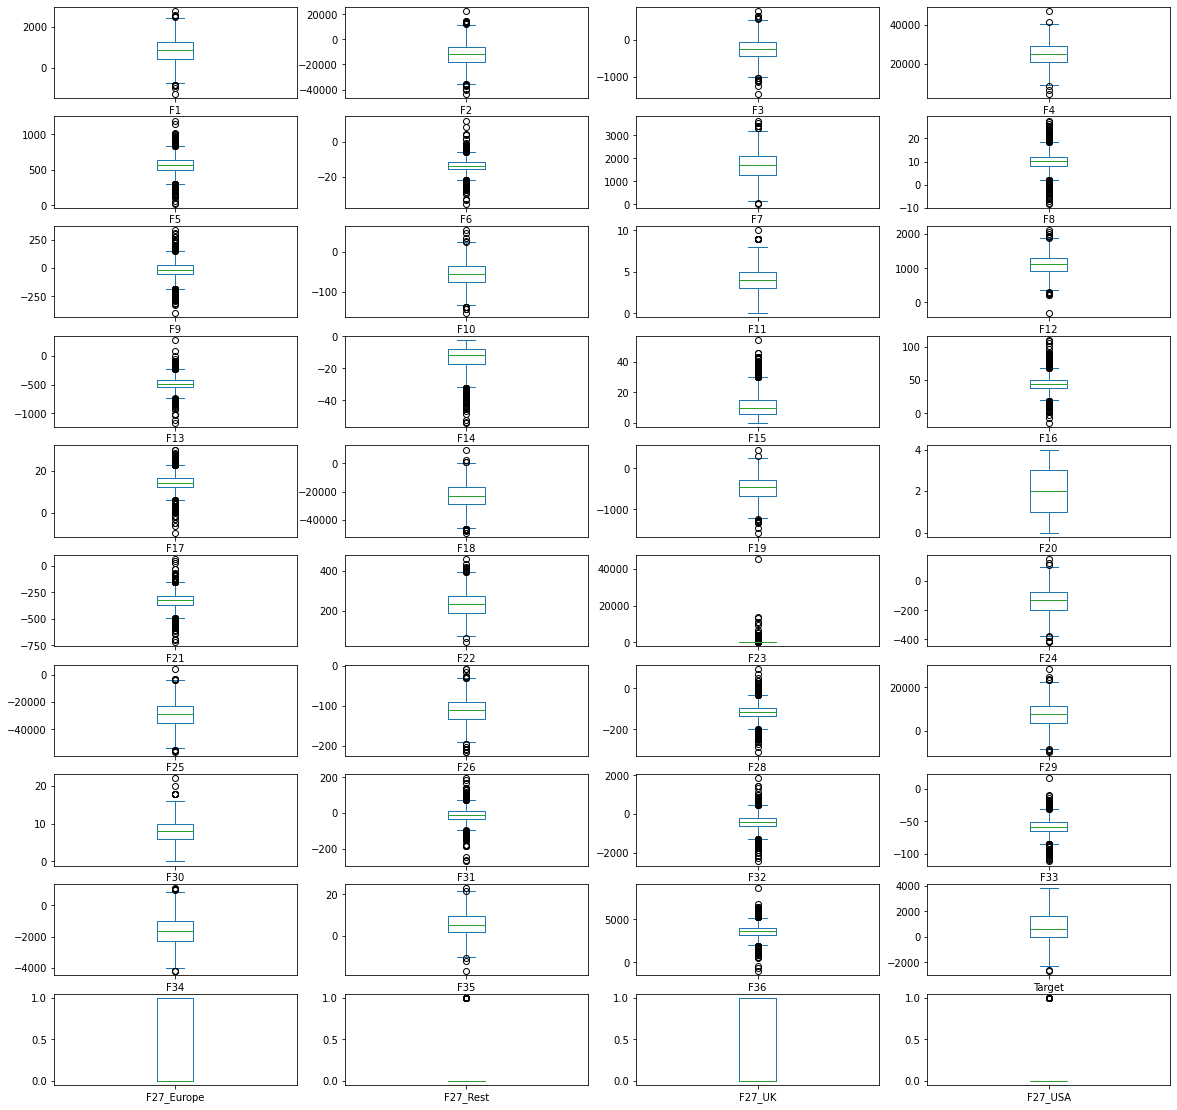

In [67]:
AENERGY.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

let's compare all features with labels to understand interaction

<function matplotlib.pyplot.show(*args, **kw)>

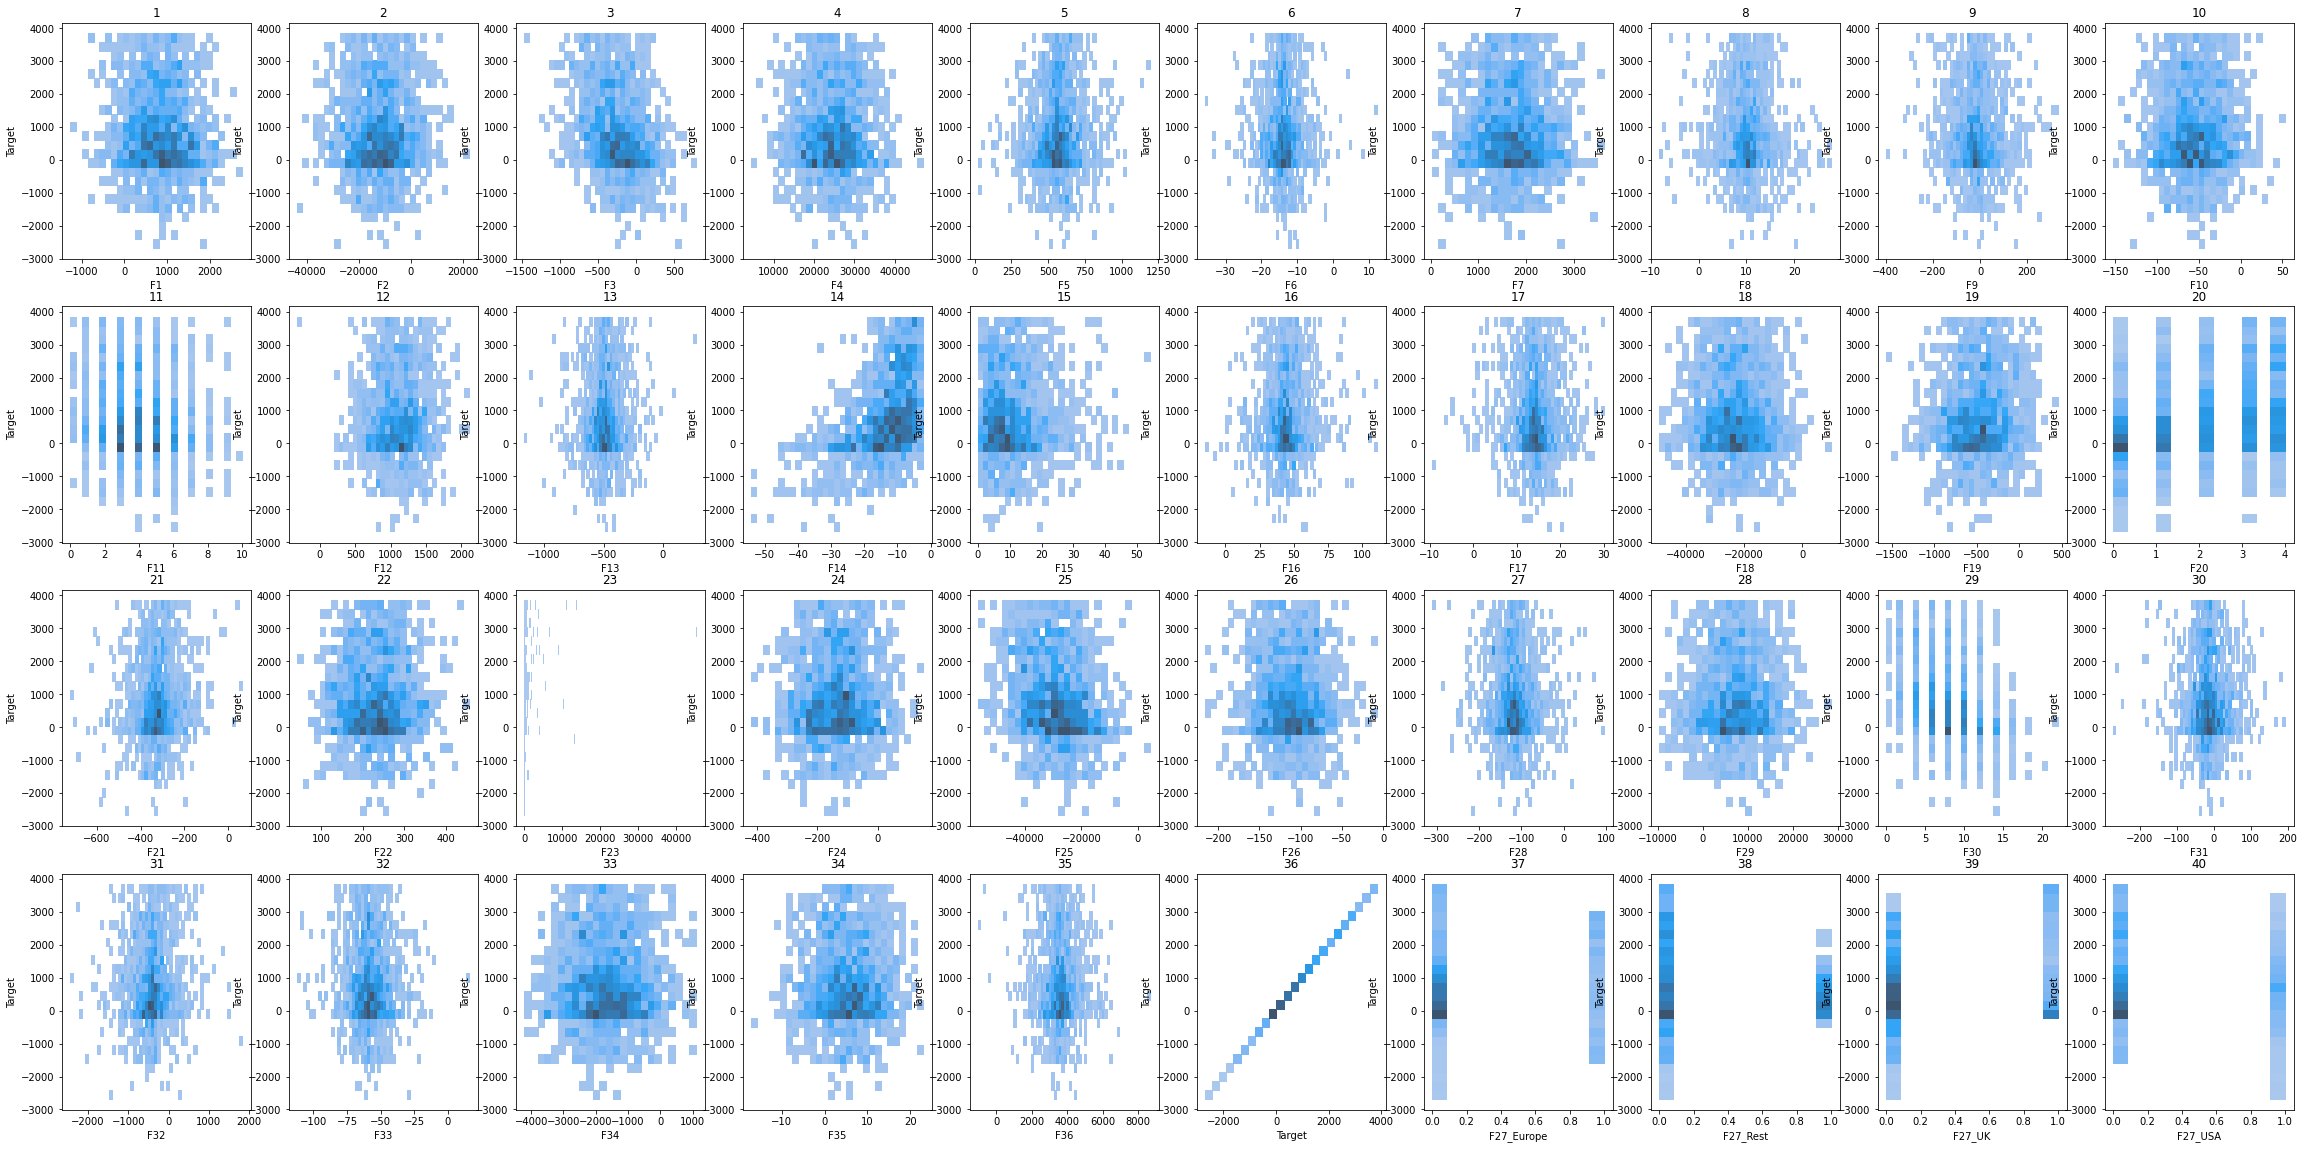

In [68]:
# compare all feature and label
plt.figure(figsize=(40,20))

for i, column in enumerate(AENERGY.columns):
  plt.subplot(4,10,i+1)
  sns.histplot(x = AENERGY[column],y= AENERGY['Target'])
  plt.title(i+1)
plt.show

# Multiple Normalization Methods

Let us normalize the data and peak at the target-variable relationship again

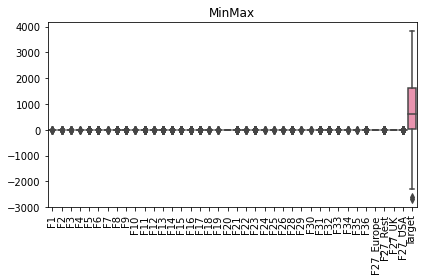

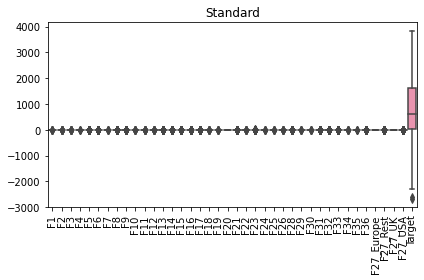

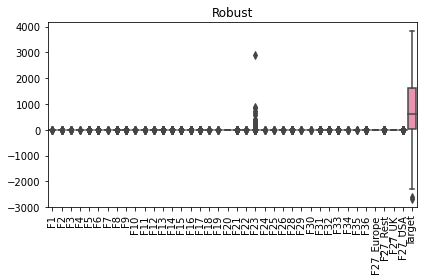

In [315]:
# Define the different normalization methods to be used
normalization_methods = {'MinMax': MinMaxScaler(),
                        'Standard': StandardScaler(),
                        'Robust': RobustScaler()}

# Create a dictionary to store the DataFrames
df_norms = {}

# Loop through the normalization methods
for method_name, method in normalization_methods.items():
    # Create a new DataFrame to store the normalized data
    df_norm = pd.DataFrame(method.fit_transform(AENERGY.drop('Target',axis=1)),columns=AENERGY.drop('Target',axis=1).columns)
    df_norm['Target']=AENERGY['Target']
    # store the dataframe in a dictionary
    df_norms[method_name] = df_norm
    # Plot a histogram of the normalized data
    sns.boxplot(data=df_norm)
    plt.title(method_name)
    plt.xticks(plt.xticks()[0], rotation=90)
    plt.tight_layout()
    plt.show()

We can see from above, much like in Part 2 of the job given to us, the best normalization looks Robust & Standard.
So we can drop the MinMax approach right away and move forward with these 2 to continue our experimentation

Also, we can see from the visualization of Standard that more of our target variable leans towards the negative in terms of expenditure

In [316]:
del df_norms['MinMax']

In [317]:
df_norms['Robust']

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F28,F29,F30,F31,F32,F33,F34,F35,F36,F27_Europe,F27_Rest,F27_UK,F27_USA,Target
0,-0.005337,-0.306797,1.102157,-1.596992,-0.782377,-1.457125,-0.997713,0.404385,-0.261373,1.604621,-1.0,-0.438120,-0.544554,0.766224,-0.267802,0.167476,-0.080097,-1.237878,-0.316113,-0.5,-0.535996,1.041158,2.492190,-1.203107,-0.220609,-0.101880,0.394490,0.382488,0.0,-0.775454,1.100377,1.248869,0.644193,-1.315394,0.791626,0.0,1.0,0.0,0.0,609.09
1,1.102552,0.619300,1.734767,-0.866669,-0.206736,1.321407,0.246935,0.267966,1.667169,1.173206,-2.0,0.005875,-1.023858,0.394058,0.506192,-0.526699,0.665049,0.670758,-0.444301,-1.0,-2.752798,-1.934000,-0.068218,0.370630,0.258141,-0.805976,0.468121,1.178627,-1.0,1.540335,-0.142400,-1.285068,-0.117166,-0.694618,-1.064497,0.0,0.0,0.0,1.0,232.66
2,-0.029607,-0.615830,0.386919,-0.806477,0.329893,-0.487353,0.300963,-0.043849,-0.095559,0.030636,-0.5,-0.111579,-0.885483,0.337764,1.078947,-0.635922,0.395631,1.651103,1.325762,0.5,0.564982,-0.894682,-0.038891,0.076933,1.290213,-0.494949,-0.462758,-1.659247,-0.5,1.295355,-0.189798,0.208145,-0.699627,0.389237,0.103493,0.0,1.0,0.0,0.0,480.01
3,0.707054,1.290813,0.454031,0.771867,-1.204015,1.045034,-0.110913,0.343484,1.291920,0.418859,0.5,-0.718728,0.992843,-0.706802,-0.199690,0.327670,0.308252,-1.157267,0.714910,1.0,-1.438553,-0.388272,1.417278,-1.595539,-0.125118,0.490051,0.751920,-0.076292,-1.5,0.104432,0.224063,-0.723982,-1.008063,0.546934,-0.842898,0.0,0.0,0.0,1.0,1685.20
4,-0.829072,0.650319,0.937157,-0.274995,-0.283398,-0.252930,-0.624655,-0.153471,-0.933301,-0.160713,0.0,0.612061,-1.295360,0.350274,0.679567,-0.393204,-1.939320,0.191581,-0.943691,0.5,0.294686,0.617187,0.023589,-0.388924,0.470704,0.069552,0.995977,1.201542,-1.5,2.719377,-1.058640,-0.504525,-0.399158,1.005006,-1.118204,0.0,1.0,0.0,0.0,617.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.159450,1.351263,0.033505,0.065640,-1.301315,-0.035780,0.985835,0.825822,0.318973,0.467575,0.5,0.265665,-0.091256,0.297107,0.252322,-0.075243,-0.487864,-0.556327,0.956793,0.0,0.196182,0.821812,67.811922,0.459842,-0.392085,-0.113145,0.512495,0.231705,0.5,0.143638,-1.047501,-0.968326,-0.244280,0.454318,-0.668769,0.0,1.0,0.0,0.0,1057.77
1496,0.134437,-0.102229,-1.279466,0.000191,0.343502,-0.423196,-1.073718,0.209501,0.716395,-0.345784,0.0,-0.738503,-0.563164,0.018765,-0.512384,0.405340,-0.320388,-1.402216,0.195303,0.5,-0.890892,1.031835,-0.014664,-0.111264,0.993647,-0.484908,-0.307448,1.192935,0.5,0.712962,0.062938,-0.147059,0.721560,-0.874844,0.676588,0.0,0.0,0.0,1.0,1232.01
1497,0.002910,0.928136,-0.401510,0.804362,0.074960,1.089451,-1.377087,-1.066991,-0.570585,-0.844497,0.0,-0.553698,-0.228916,-0.963253,0.230650,1.553398,0.060680,1.088176,0.788195,0.5,-2.253446,-0.938600,0.825630,0.654805,-1.425063,-0.726627,-2.078264,-0.352272,0.5,-1.111204,-0.205567,-0.158371,-0.075507,1.861076,1.041358,1.0,0.0,0.0,0.0,2037.64
1498,-0.531866,-0.382921,0.390432,0.216885,-0.093785,0.479951,-0.107104,-0.092570,-1.880942,0.699604,2.0,-0.516154,-0.673387,-0.487881,0.007740,-0.548544,-0.771845,0.404857,-0.358545,-0.5,0.748321,-0.126970,-0.093720,0.410725,-0.967010,-0.908100,-0.408631,0.311643,0.0,-0.077581,-0.161515,1.169683,-0.047766,0.439299,-0.015345,0.0,1.0,0.0,0.0,-27.86


Checking for null values before we proceed with outlier removal

In [72]:
AENERGY.isna().sum()

F1            0
F2            0
F3            0
F4            0
F5            0
F6            0
F7            0
F8            0
F9            0
F10           0
F11           0
F12           0
F13           0
F14           0
F15           0
F16           0
F17           0
F18           0
F19           0
F20           0
F21           0
F22           0
F23           0
F24           0
F25           0
F26           0
F28           0
F29           0
F30           0
F31           0
F32           0
F33           0
F34           0
F35           0
F36           0
Target        0
F27_Europe    0
F27_Rest      0
F27_UK        0
F27_USA       0
dtype: int64

## Removing Outliers

In [73]:
# for key in df_norms:
#   print(df_norms[key].describe())

df_norms['Robust'].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target,F27_Europe,F27_Rest,F27_UK,F27_USA
count,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000
mean,-0.01404,-0.00867,0.00169,-0.01989,0.01474,0.00573,-0.01951,-0.00629,0.00627,0.01169,-0.01533,-0.02642,-0.00902,-0.20610,0.17538,-0.00014,-0.02442,0.00334,-0.01881,0.00633,0.00915,-0.01402,9.27685,-0.01554,-0.01568,-0.00731,0.00703,-0.00883,-0.01133,0.01752,-0.02075,0.02422,0.01488,0.00687,-0.01560,0.14558,0.26200,0.24333,0.25200,0.24267
std,0.73690,0.76460,0.76744,0.73233,0.98176,1.04326,0.74086,1.02678,0.99073,0.75072,0.91469,0.75435,1.00920,0.87290,0.82764,1.05158,1.05047,0.74972,0.77184,0.71260,0.97056,0.74472,89.75547,0.73491,0.73402,0.73536,1.00342,0.75238,0.87791,1.05408,0.99303,0.94083,0.73720,0.74713,1.03000,0.76816,0.43987,0.42924,0.43431,0.42884
min,-2.63734,-2.69559,-3.15322,-2.55065,-4.10921,-5.36829,-2.10714,-4.49208,-4.60746,-2.44234,-2.00000,-3.74283,-5.41775,-4.39719,-1.00155,-4.76214,-5.75971,-2.23529,-2.89640,-1.00000,-4.69106,-2.35233,-0.13835,-2.38942,-2.20919,-2.54577,-4.72778,-2.17543,-2.00000,-6.13912,-4.70467,-4.05430,-2.04774,-2.80726,-5.64544,-2.07965,0.00000,0.00000,0.00000,0.00000
25%,-0.51625,-0.52361,-0.49611,-0.52580,-0.50204,-0.48920,-0.52513,-0.51888,-0.49027,-0.48873,-0.50000,-0.53369,-0.50060,-0.57701,-0.43189,-0.50485,-0.49515,-0.49452,-0.53117,-0.50000,-0.51314,-0.53640,-0.12050,-0.53208,-0.52138,-0.49648,-0.49994,-0.49624,-0.50000,-0.46982,-0.52752,-0.48190,-0.48689,-0.47497,-0.51528,-0.38161,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,0.48375,0.47639,0.50389,0.47420,0.49796,0.51080,0.47487,0.48112,0.50973,0.51127,0.50000,0.46631,0.49940,0.42299,0.56811,0.49515,0.50485,0.50548,0.46883,0.50000,0.48686,0.46360,0.87950,0.46792,0.47862,0.50352,0.50006,0.50376,0.50000,0.53018,0.47248,0.51810,0.51311,0.52503,0.48472,0.61839,1.00000,0.00000,1.00000,0.00000
max,2.36668,2.88589,2.63134,2.71743,4.73860,6.44911,2.41106,4.28015,4.19293,2.73715,3.00000,2.57618,6.08625,1.00391,4.58050,5.40049,3.83738,2.80444,2.41439,1.00000,4.56427,2.73189,2895.45872,2.36812,2.63980,2.56291,5.16689,2.65892,3.50000,4.90686,5.09043,5.58597,2.21294,2.19900,6.16044,2.01749,1.00000,1.00000,1.00000,1.00000


In [74]:
df_norms['Standard'].describe(include='all').apply(lambda s: s.apply('{0:.5f}'.format))

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target,F27_Europe,F27_Rest,F27_UK,F27_USA
count,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000,1500.00000
mean,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000
std,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033
min,-3.56109,-3.51534,-4.11231,-3.45691,-4.20198,-5.15292,-2.81879,-4.37025,-4.65846,-3.26997,-2.17050,-4.92828,-5.36119,-4.80293,-1.42252,-4.52992,-5.46157,-2.98696,-3.72946,-1.41267,-4.84440,-3.14089,-0.10493,-3.23127,-2.98933,-3.45315,-4.72024,-2.88061,-2.26599,-5.84275,-4.71836,-4.33648,-2.79883,-3.76782,-5.46768,-2.89779,-0.59583,-0.56709,-0.58043,-0.56606
25%,-0.68174,-0.67370,-0.64887,-0.69105,-0.52656,-0.47457,-0.68270,-0.49939,-0.50135,-0.66680,-0.53005,-0.67268,-0.48726,-0.42506,-0.73399,-0.48012,-0.44826,-0.66429,-0.66403,-0.71078,-0.53831,-0.70168,-0.10473,-0.70310,-0.68916,-0.66544,-0.50541,-0.64804,-0.55681,-0.46250,-0.51049,-0.53813,-0.68086,-0.64513,-0.48529,-0.68654,-0.59583,-0.56709,-0.58043,-0.56606
50%,0.01906,0.01134,-0.00220,0.02717,-0.01502,-0.00549,0.02635,0.00613,-0.00633,-0.01557,0.01677,0.03504,0.00894,0.23619,-0.21198,0.00013,0.02326,-0.00446,0.02438,-0.00889,-0.00943,0.01883,-0.10339,0.02115,0.02138,0.00994,-0.00701,0.01174,0.01291,-0.01663,0.02091,-0.02575,-0.02019,-0.00920,0.01515,-0.18958,-0.59583,-0.56709,-0.58043,-0.56606
75%,0.67575,0.63461,0.65460,0.67491,0.49237,0.48429,0.66753,0.47486,0.50834,0.66569,0.56359,0.65341,0.50395,0.72093,0.47467,0.47114,0.50402,0.66999,0.63200,0.69300,0.49237,0.64155,-0.09359,0.65808,0.67365,0.69489,0.49152,0.68152,0.58264,0.48652,0.49686,0.52511,0.67607,0.69376,0.48591,0.61571,1.67833,-0.56709,1.72286,-0.56606
max,3.23179,3.78700,3.42766,3.73906,4.81325,6.17828,3.28184,4.17603,4.22725,3.63165,3.29767,3.45128,6.04169,1.38666,5.32430,5.13742,3.67750,3.73746,3.15352,1.39489,4.69487,3.68840,32.16678,3.24457,3.61892,3.49635,5.14399,3.54691,4.00100,4.64005,5.14877,5.91352,2.98261,2.93503,5.99814,2.43768,1.67833,1.76340,1.72286,1.76660


We will make use of Local Outlier Factor for outlier detection as it is better suited and performed best in our P2 as well by a margin.

In [318]:
# Create a dictionary to store the dataframes without outliers
df_no_outliers = {}

for key in df_norms:
    df = df_norms[key]
    # Local Outlier Factor
    clf = LocalOutlierFactor(n_neighbors=20, contamination=float(.1))
    pred = clf.fit_predict(df.drop(['Target'], axis=1))
    df_out = df[pred == 1]
    df_no_outliers["Local Outlier Factor " + key] = df_out
    print(f'Local Outlier Factor removed {len(df) - len(df_out)} outlier rows')

Local Outlier Factor removed 150 outlier rows
Local Outlier Factor removed 150 outlier rows


# Model Training

## Default Parameters & Investigation

We will first apply Linear Regression and see what is the effect of normalization techniques above; Standard & Robust.


In [138]:
for key in df_no_outliers:
  X_train, X_test, y_train, y_test = train_test_split(df_no_outliers[key].drop(columns="Target"), df_no_outliers[key]['Target'], test_size=0.3)
  model_linear_regression=LinearRegression()
  model_linear_regression.fit(X_train,y_train)
  y_predtr_model=model_linear_regression.predict(X_train)
  y_pred_model=model_linear_regression.predict(X_test)
  print("rmse_train:",round(np.sqrt(mean_squared_error(y_train, y_predtr_model)),3))
  print("rmse_test:",round(np.sqrt(mean_squared_error(y_test, y_pred_model)),3))
  print("\n")

rmse_train: 0.513
rmse_test: 0.564


rmse_train: 0.388
rmse_test: 0.401




In [137]:
for key in df_no_outliers:
  X_train, X_test, y_train, y_test = train_test_split(df_no_outliers[key].drop(columns="Target"), df_no_outliers[key]['Target'], test_size=0.3)
  model_regression=XGBRegressor()
  model_regression.fit(X_train,y_train)
  print("Normalization In Effect: ",key)
  y_predtr_model=model_regression.predict(X_train)
  y_pred_model=model_regression.predict(X_test)
  print("rmse_train:",round(np.sqrt(mean_squared_error(y_train, y_predtr_model)),3))
  print("rmse_test:",round(np.sqrt(mean_squared_error(y_test, y_pred_model)),3))
  print("\n")

[23:05:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Normalization In Effect:  Local Outlier Factor Standard
rmse_train: 0.226
rmse_test: 0.435


[23:05:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Normalization In Effect:  Local Outlier Factor Robust
rmse_train: 0.179
rmse_test: 0.327




From above, we can note that in both cases, with Robust, we see a lower rmse, and specifically with XGBRegressor, we see marginal increase on default settings already, and overfitting too (but we see that in all cases tested above)

In [112]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import sklearn.gaussian_process as gp

for key in df_no_outliers:
  print("Normalization in Effect: ", key)
  X_train, X_test, y_train, y_test = train_test_split(df_no_outliers[key].drop(columns="Target"), df_no_outliers[key]['Target'], test_size=0.3)
  kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
  model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
  model.fit(X_train, y_train)
  params = model.kernel_.get_params()
  y_pred, std = model.predict(X_test, return_std=True)
  MSE = ((y_pred-y_test)**2).mean()
  print("RMSE:",np.sqrt(MSE))


Normalization in Effect:  Local Outlier Factor Standard
RMSE: 0.5802717715638008
Normalization in Effect:  Local Outlier Factor Robust
RMSE: 0.3633772936383102


We have tried 3 approaches to get the rough idea on where we are headed, and we have tried one exciting approach too; Gausian Process Regressor. It restarts 10 times to find itself the best parameters.


## Multiple Models Training -> Finetune Approach

In [334]:
def run_random_search(regressor, parameters, X_train, y_train):
    pipeline = Pipeline([('regressor', regressor)])
    random_search = RandomizedSearchCV(pipeline, param_distributions=parameters, n_iter=10, cv=5, n_jobs=-1)
    random_search.fit(X_train, y_train)
    return random_search

regressors = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Gaussian Process Regressor': GaussianProcessRegressor(),
    'Support Vector Regressor': SVR(),
    'XGBRegressor': XGBRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'MLPRegressor': MLPRegressor(),
    'ElasticNet': ElasticNet()
}

parameters = {
    'Linear Regression': {'regressor__fit_intercept': [True, False]},
    'Lasso': {'regressor__alpha': np.linspace(0.0001, 1, 10)},
    'Ridge': {'regressor__alpha': np.linspace(0.0001, 1, 10)},
    'Gaussian Process Regressor': {'regressor__normalize_y': [True, False]},
    'Support Vector Regressor': {'regressor__C': np.linspace(0.0001, 1, 10)},
    'XGBRegressor': {'regressor__learning_rate': np.linspace(0.0001, 1, 10), 'regressor__n_estimators': [50, 100, 150]},
    'RandomForestRegressor':{
            'regressor__n_estimators': [100,400,700,1000],
            'regressor__max_features': ["auto", "sqrt"],
            'regressor__max_depth' : [3,5,None],
            'regressor__min_samples_split' : [2, 5, 10],
            'regressor__min_samples_leaf' : [1, 2, 4],
            'regressor__bootstrap': [True, False],
        },
    'MLPRegressor':{
            'regressor__activation': ['identity', 'logistic', 'tanh', 'relu'],
            'regressor__solver': ['lbfgs', 'sgd', 'adam'],
            'regressor__power_t': [0.1,0.5,0.8],
            'regressor__max_iter': [200,800,1600],
            'regressor__shuffle': [True,False],
            'regressor__verbose': [True,False],
            'regressor__warm_start': [True,False],
            'regressor__nesterovs_momentum': [True,False],
            'regressor__early_stopping': [True,False],
            'regressor__validation_fraction': [0.1,0.5,0.8]
        },
    'ElasticNet':{
            'regressor__alpha': [0.5,1,2,4],
            'regressor__l1_ratio': [0,0.5,1],
            'regressor__fit_intercept': [True,False],
            'regressor__precompute': [True,False],
            'regressor__max_iter': [500,1000,2000,4000],
            'regressor__copy_X': [True,False],
            'regressor__warm_start': [True,False],
            'regressor__positive': [True,False],
            'regressor__selection': ['cyclic','random']
        }
}

results_list=list()
i=0
for name, regressor in regressors.items():
  for key in df_no_outliers:
      X_train, X_test, y_train, y_test = train_test_split(df_no_outliers[key].drop(columns="Target"), df_no_outliers[key]['Target'], test_size=0.3)
      random_search = run_random_search(regressor, parameters[name], df_no_outliers[key].drop(['Target'], axis=1), df_no_outliers[key]['Target'])
      y_predtr_model=random_search.predict(X_train)
      y_pred_model=random_search.predict(X_test)
      rmse_train=round(np.sqrt(mean_squared_error(y_train, y_predtr_model)),4)
      rmse_test=round(np.sqrt(mean_squared_error(y_test, y_pred_model)),4)
      #print(name, 'best parameters:', random_search.best_params_)
      joblib.dump(random_search, f'model_{name}__{key}_.pkl')
      i+=1
      results_list.append({'Normalization & Outlier & Imputer': key,'Model': name,"RMSE_train":rmse_train,"RMSE_test":rmse_test,'best_params': random_search.best_estimator_})


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[01:55:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:55:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "/u

In [335]:
results_df = pd.DataFrame(results_list)
results_df

,Normalization & Outlier & Imputer,Model,RMSE_train,RMSE_test,best_params
0,Local Outlier Factor Standard,Linear Regression,642.3189,638.6553,(LinearRegression())
1,Local Outlier Factor Robust,Linear Regression,620.9489,612.9126,(LinearRegression())
2,Local Outlier Factor Standard,Lasso,637.1253,650.8020,(Lasso())
3,Local Outlier Factor Robust,Lasso,617.2134,621.8430,(Lasso())
4,Local Outlier Factor Standard,Ridge,641.9079,639.6084,(Ridge())
5,Local Outlier Factor Robust,Ridge,604.2631,650.6736,(Ridge())
6,Local Outlier Factor Standard,Gaussian Process Regressor,0.0000,0.0000,(GaussianProcessRegressor(normalize_y=True))
7,Local Outlier Factor Robust,Gaussian Process Regressor,0.0000,0.0000,(GaussianProcessRegressor(normalize_y=True))
8,Local Outlier Factor Standard,Support Vector Regressor,1237.5903,1186.3401,(SVR())
9,Local Outlier Factor Robust,Support Vector Regressor,1201.7318,1218.3027,(SVR())


Interesting!
Gaussian Process Regressor has a 0 RMSE.

Let us deep dive into the kind of predictions it is making on the test_dataset to see whether values are changing or not, there is a probability that posterior covariance between each of my training examples and each test example is 0 or very close to 0, so the model just predicts the mean function for each test example.

In [321]:
gp = GaussianProcessRegressor()
X = df_no_outliers['Local Outlier Factor Robust'].drop(columns="Target")
y = df_no_outliers['Local Outlier Factor Robust']['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scores = cross_val_score(gp, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("Cross-validation RMSE scores: {}".format(rmse_scores))
print("Average cross-validation RMSE score: {:.2f}".format(rmse_scores.mean()))
gp.fit(X_train,y_train)

Cross-validation RMSE scores: [1501.94013545 1519.92321045 1521.68234797 1391.44883998 1569.60285413
 1638.4232874  1301.52741577 1603.82260946 1513.12539528 1373.40736872]
Average cross-validation RMSE score: 1493.49


GaussianProcessRegressor()

In [322]:
y_predtr_model=gp.predict(X_train)
y_pred_model=gp.predict(X_test)
rmse_train=round(np.sqrt(mean_squared_error(y_train, y_predtr_model)),4)
rmse_test=round(np.sqrt(mean_squared_error(y_test, y_pred_model)),4)
print("rmse_train: ",rmse_train)
print("rmse_test: ",rmse_test)

rmse_train:  0.0
rmse_test:  1373.0651


In [323]:
test_data=pd.read_csv("/content/gdrive/MyDrive/CE802_P3_Test.csv")

In [324]:
test_data = test_data.replace({'F20': {'Very low':0, 'Low': 1, 'Medium': 2, 'High':3, 'Very high':4}})
test_data = pd.get_dummies(test_data, columns=['F27'])

In [325]:
test_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target,F27_Europe,F27_Rest,F27_UK,F27_USA
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,0.0,1500.000000,1500.00000,1500.00000,1500.000000
mean,841.237427,-11731.84814,-240.448047,24555.387027,569.983780,-13.905433,1686.899213,10.208473,-16.307960,-54.308587,4.035333,1095.160560,-497.214840,-13.867320,11.361840,44.338440,14.191013,-22920.808320,-479.112027,1.964000,-320.906920,231.883320,254.158133,-138.759640,-28740.608120,-108.623373,-115.630707,7601.804427,7.954667,-13.643787,-389.479913,-58.640120,-1677.274720,5.686760,3606.088347,NaN,0.254667,0.23200,0.25800,0.255333
std,597.143088,8910.49611,310.222185,5934.257374,130.708355,4.290782,609.692830,4.254144,83.891585,29.388727,1.842557,291.051594,130.446298,8.408681,8.305455,12.534405,4.312416,9093.823285,299.563904,1.401909,87.405065,59.918724,5865.982176,92.702043,8882.368373,30.996567,41.586490,6034.610839,3.486457,44.179155,409.856953,13.172849,888.178329,6.159198,839.063139,NaN,0.435819,0.42225,0.43768,0.436194
min,-1038.200000,-39362.19000,-1274.030000,3725.560000,-61.200000,-30.880000,-477.420000,-6.850000,-389.560000,-162.670000,0.000000,75.350000,-1076.520000,-58.590000,0.180000,-22.230000,-13.880000,-52041.180000,-1415.120000,0.000000,-683.800000,27.100000,0.000000,-407.040000,-61192.080000,-219.850000,-298.520000,-11996.700000,0.000000,-251.200000,-2389.450000,-120.150000,-4940.010000,-14.740000,469.360000,NaN,0.000000,0.00000,0.00000,0.000000
25%,436.655000,-17736.97500,-446.575000,20513.160000,506.715000,-15.882500,1286.425000,8.097500,-58.240000,-73.352500,3.000000,895.325000,-558.592500,-18.157500,5.430000,38.610000,12.050000,-28948.717500,-674.545000,1.000000,-359.545000,190.655000,0.295000,-202.935000,-34915.440000,-129.670000,-136.395000,3518.475000,6.000000,-34.907500,-606.960000,-65.137500,-2248.612500,1.550000,3186.025000,NaN,0.000000,0.00000,0.00000,0.000000
50%,850.650000,-12013.44000,-235.875000,24592.150000,570.285000,-13.865000,1688.890000,10.175000,-17.910000,-53.880000,4.000000,1097.505000,-492.810000,-11.940000,9.360000,44.160000,14.255000,-23232.855000,-481.470000,2.000000,-319.440000,231.650000,1.920000,-139.065000,-28704.945000,-108.980000,-114.620000,7479.380000,8.000000,-14.560000,-381.825000,-58.770000,-1663.230000,5.620000,3593.920000,NaN,0.000000,0.00000,0.00000,0.000000
75%,1222.935000,-5664.67500,-32.092500,28599.565000,634.185000,-11.670000,2126.595000,12.210000,24.510000,-35.412500,5.000000,1288.405000,-434.242500,-7.650000,14.970000,50.167500,16.340000,-16977.150000,-273.302500,3.000000,-279.290000,272.765000,13.205000,-78.030000,-22987.200000,-86.815000,-94.145000,11713.265000,10.000000,6.812500,-176.062500,-52.050000,-1091.670000,9.820000,4009.345000,NaN,1.000000,0.00000,1.00000,1.000000
max,2835.120000,19889.46000,931.380000,43217.620000,1226.250000,6.700000,3654.640000,37.400000,473.100000,60.690000,11.000000,1996.120000,88.770000,-2.190000,62.940000,110.010000,28.880000,8924.880000,665.310000,4.000000,84.820000,459.700000,224929.740000,168.720000,4006.620000,15.350000,99.160000,28864.060000,20.000000,263.760000,1692.540000,6.150000,1110.690000,24.140000,8843.040000,NaN,1.000000,1.00000,1.00000,1.000000


In [266]:
test_data.drop('Target',axis=1,inplace=True)
test_data=pd.DataFrame(method.fit_transform(test_data),columns=test_data.columns)
ok=gp.predict(test_data)

In [267]:
ok=pd.DataFrame(ok)

In [268]:
ok.head(15)

,0
0,-6.359765e-07
1,-2.620792e-06
2,-3.858905e-05
3,-5.674098e-05
4,2.847587e-05
5,-9.839349e-08
6,1.727911e-06
7,7.018057e-05
8,-3.694612e-05
9,-5.047880e-06


Interesting, the results are varying also. But they seem really small.
To not risk the skewness, I will drop this model and use the rest - best 3 for averaging their results and placing them in P3_Test for AENERGY's expenditure goal.

Also, before we do that, let's review based on XGBRegressor feature importance, and also features correlation with our Target.

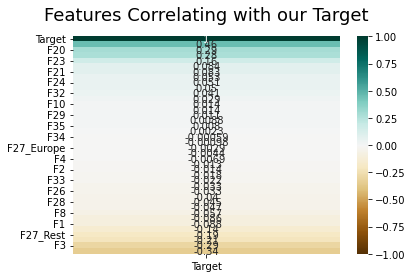

In [326]:
heatmap = sns.heatmap(df_no_outliers['Local Outlier Factor Robust'].corr()[['Target']].sort_values(by='Target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with our Target', fontdict={'fontsize':18}, pad=16);

[01:08:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

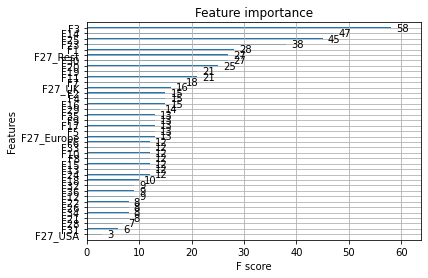

<Figure size 576x864 with 0 Axes>

In [270]:
gp = XGBRegressor(n_estimators=100,learning_rate=0.223)
X = df_no_outliers['Local Outlier Factor Robust'].drop(columns="Target")
y = df_no_outliers['Local Outlier Factor Robust']['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scores = cross_val_score(gp, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("Cross-validation RMSE scores: {}".format(rmse_scores))
print("Average cross-validation RMSE score: {:.2f}".format(rmse_scores.mean()))
gp.fit(X_train,y_train)
plot_importance(gp.get_booster())
plt.figure(figsize=(8, 12))
plt.show()

Close enough, F3 tops it here and F23 is a close second. 

# Model Prediction

In [286]:
test_data=pd.read_csv("/content/gdrive/MyDrive/CE802_P3_Test.csv")
test_data = test_data.replace({'F20': {'Very low':0, 'Low': 1, 'Medium': 2, 'High':3, 'Very high':4}})
test_data = pd.get_dummies(test_data, columns=['F27'])

In [328]:
results_df

,Normalization & Outlier & Imputer,Model,RMSE_train,RMSE_test,best_params
0,Local Outlier Factor Standard,Linear Regression,627.5269,672.0984,(LinearRegression())
1,Local Outlier Factor Robust,Linear Regression,618.7762,618.0184,(LinearRegression())
2,Local Outlier Factor Standard,Lasso,642.4759,638.4102,(Lasso())
3,Local Outlier Factor Robust,Lasso,625.3883,602.4836,(Lasso())
4,Local Outlier Factor Standard,Ridge,643.0484,636.9298,(Ridge())
5,Local Outlier Factor Robust,Ridge,623.2954,607.3400,(Ridge())
6,Local Outlier Factor Standard,Gaussian Process Regressor,0.0000,0.0000,(GaussianProcessRegressor(normalize_y=True))
7,Local Outlier Factor Robust,Gaussian Process Regressor,0.0000,0.0000,(GaussianProcessRegressor(normalize_y=True))
8,Local Outlier Factor Standard,Support Vector Regressor,1195.8406,1282.3641,(SVR())
9,Local Outlier Factor Robust,Support Vector Regressor,1209.6094,1199.9743,(SVR())


In [339]:
finale_models=results_df.sort_values(by='RMSE_test',ascending=True)[2:6]
finale_models

,Normalization & Outlier & Imputer,Model,RMSE_train,RMSE_test,best_params
15,Local Outlier Factor Robust,MLPRegressor,177.8329,162.8876,"(MLPRegressor(power_t=0.8, solver='lbfgs', val..."
10,Local Outlier Factor Standard,XGBRegressor,240.3945,243.0684,(XGBRegressor(learning_rate=0.1112000000000000...
11,Local Outlier Factor Robust,XGBRegressor,233.8540,246.9024,(XGBRegressor(learning_rate=0.1112000000000000...
12,Local Outlier Factor Standard,RandomForestRegressor,275.2168,294.2300,"((DecisionTreeRegressor(max_features='auto', m..."


In [257]:
# finale_models['Model'] = finale_models['Model'].replace(['Support Vector Regressor'],['SVR'])
# finale_models['best_params'] = finale_models['best_params'].replace(['regressor__'],[''])

In [340]:
finale_models

,Normalization & Outlier & Imputer,Model,RMSE_train,RMSE_test,best_params
15,Local Outlier Factor Robust,MLPRegressor,177.8329,162.8876,"(MLPRegressor(power_t=0.8, solver='lbfgs', val..."
10,Local Outlier Factor Standard,XGBRegressor,240.3945,243.0684,(XGBRegressor(learning_rate=0.1112000000000000...
11,Local Outlier Factor Robust,XGBRegressor,233.8540,246.9024,(XGBRegressor(learning_rate=0.1112000000000000...
12,Local Outlier Factor Standard,RandomForestRegressor,275.2168,294.2300,"((DecisionTreeRegressor(max_features='auto', m..."


In [341]:
models = []
for index, row in finale_models.iterrows():
        model = row['best_params']
        key = row['Normalization & Outlier & Imputer']
        X_train, X_test, y_train, y_test = train_test_split(df_no_outliers[key].drop("Target", axis=1), df_no_outliers[key]["Target"], test_size=0.3, random_state=42)
        model.fit(X_train, y_train)
        models.append({'Model': row['Model'], 'best_estimator': row['best_params'], 'key': key, 'model': model})


[02:11:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:11:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [342]:
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target,F27_Europe,F27_Rest,F27_UK,F27_USA
0,1209.10,-6727.56,-417.86,29985.68,483.00,-12.62,599.56,14.63,35.44,-47.63,9,1307.89,-520.53,-4.17,9.87,61.77,9.46,-30472.50,-357.22,1,-285.16,154.84,0.22,-274.53,-24545.31,-147.84,-126.65,12004.34,14,-2.26,-865.92,-70.83,-3121.86,0.06,2486.18,NaN,0,1,0,0
1,1027.20,1509.39,-152.59,23458.60,575.37,-17.69,1801.36,7.33,52.02,-106.12,5,1277.85,-725.16,-39.75,10.20,37.02,15.67,-25672.53,-528.80,2,-184.02,346.10,0.46,78.99,-24269.79,-96.41,-104.42,3227.10,12,-71.25,-111.20,-58.05,-870.39,6.68,2835.52,NaN,0,0,1,0
2,1146.04,367.26,-93.47,18350.24,511.86,-18.92,1621.66,10.80,29.78,-52.25,2,809.68,-601.47,-19.77,28.68,45.72,25.06,-26081.10,-435.11,1,-294.04,166.56,0.02,33.51,-43515.90,-159.02,-161.15,4538.24,10,-31.63,-270.24,-64.47,-2605.53,6.78,2280.94,NaN,0,1,0,0
3,452.64,-14607.60,73.16,23934.94,671.04,-14.73,2311.62,9.61,-24.52,-93.10,4,1466.75,-498.51,-9.78,24.27,37.17,10.80,-17529.87,-658.33,0,-373.52,188.74,0.56,-145.71,-21381.12,-146.47,-111.41,10655.60,12,5.77,5.01,-58.74,-1270.80,6.04,1538.68,NaN,0,0,0,1
4,861.74,-16186.68,-781.53,26840.00,556.98,-11.88,1207.46,10.89,13.58,-53.09,1,1395.61,-521.37,-8.61,15.27,44.85,14.11,-27078.36,-360.14,2,-218.18,172.16,70.56,-164.04,-32153.07,-123.95,-110.52,11975.04,6,-6.67,-110.19,-42.33,-941.19,6.92,4284.04,NaN,1,0,0,0


In [343]:
from joblib import load
predictions_df = pd.DataFrame()
normalization_methods = {'Standard': StandardScaler(), 'MinMax': MinMaxScaler(), 'Robust': RobustScaler()}
i = 0
# Loop through the models
for model in models:
    key = model['key']
    print(model['Model'],model['key'])
    model = model['model']
    normalization_method_key = key.split()[3]
    normalization_method = normalization_methods[normalization_method_key]
    test_data_temp = test_data.copy()
    test_data_temp.drop('Target',axis=1,inplace=True)
    test_data_temp = normalization_method.fit_transform(test_data_temp)
    tst_dt=pd.DataFrame(test_data_temp,columns=test_data.drop('Target',axis=1).columns)
    y_predtr_model=model.predict(X_train)
    y_pred_model=model.predict(X_test)
    rmse_train=round(np.sqrt(mean_squared_error(y_train, y_predtr_model)),4)
    rmse_test=round(np.sqrt(mean_squared_error(y_test, y_pred_model)),4)
    print("Sanity Check:",rmse_train, rmse_test)
    predictions = model.predict(tst_dt)
    predictions_df['prediction_'+str(i)] = predictions
    i += 1

MLPRegressor Local Outlier Factor Robust
Sanity Check: 1003.2332 1032.225
XGBRegressor Local Outlier Factor Standard
Sanity Check: 218.5054 448.019
XGBRegressor Local Outlier Factor Robust
Sanity Check: 572.0547 555.7145
RandomForestRegressor Local Outlier Factor Standard
Sanity Check: 292.7719 663.5004


In [345]:
del predictions_df['prediction_3']

In [346]:
predictions_df.head()

,prediction_0,prediction_1,prediction_2
0,187.237477,421.278717,-233.870941
1,-967.230174,-344.513184,-846.192871
2,209.117469,726.249268,-275.622864
3,-847.228894,289.467804,-942.142151
4,3203.928881,2590.018555,3021.639893


In [347]:
#manual weighing based on sanity check output.
predictions_df['0_1']=predictions_df['prediction_0']
predictions_df['2_1']=predictions_df['prediction_2']
predictions_df['2_2']=predictions_df['prediction_2']

In [348]:
predictions_df.head()

,prediction_0,prediction_1,prediction_2,0_1,2_1,2_2
0,187.237477,421.278717,-233.870941,187.237477,-233.870941,-233.870941
1,-967.230174,-344.513184,-846.192871,-967.230174,-846.192871,-846.192871
2,209.117469,726.249268,-275.622864,209.117469,-275.622864,-275.622864
3,-847.228894,289.467804,-942.142151,-847.228894,-942.142151,-942.142151
4,3203.928881,2590.018555,3021.639893,3203.928881,3021.639893,3021.639893


## Ensemble: Mean of best models

In [351]:
predictions_df['Target']=predictions_df.mean(axis=1)

In [352]:
predictions_df.head()

,prediction_0,prediction_1,prediction_2,0_1,2_1,2_2,Target
0,187.237477,421.278717,-233.870941,187.237477,-233.870941,-233.870941,15.690141
1,-967.230174,-344.513184,-846.192871,-967.230174,-846.192871,-846.192871,-802.925358
2,209.117469,726.249268,-275.622864,209.117469,-275.622864,-275.622864,52.935936
3,-847.228894,289.467804,-942.142151,-847.228894,-942.142151,-942.142151,-705.236073
4,3203.928881,2590.018555,3021.639893,3203.928881,3021.639893,3021.639893,3010.465999


In [353]:
test_data=pd.read_csv("/content/gdrive/MyDrive/CE802_P3_Test.csv")
test_data['Target']=predictions_df['Target']
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,1209.10,-6727.56,-417.86,29985.68,483.00,-12.62,599.56,14.63,35.44,-47.63,9,1307.89,-520.53,-4.17,9.87,61.77,9.46,-30472.50,-357.22,Low,-285.16,154.84,0.22,-274.53,-24545.31,-147.84,Rest,-126.65,12004.34,14,-2.26,-865.92,-70.83,-3121.86,0.06,2486.18,15.690141
1,1027.20,1509.39,-152.59,23458.60,575.37,-17.69,1801.36,7.33,52.02,-106.12,5,1277.85,-725.16,-39.75,10.20,37.02,15.67,-25672.53,-528.80,Medium,-184.02,346.10,0.46,78.99,-24269.79,-96.41,UK,-104.42,3227.10,12,-71.25,-111.20,-58.05,-870.39,6.68,2835.52,-802.925358
2,1146.04,367.26,-93.47,18350.24,511.86,-18.92,1621.66,10.80,29.78,-52.25,2,809.68,-601.47,-19.77,28.68,45.72,25.06,-26081.10,-435.11,Low,-294.04,166.56,0.02,33.51,-43515.90,-159.02,Rest,-161.15,4538.24,10,-31.63,-270.24,-64.47,-2605.53,6.78,2280.94,52.935936
3,452.64,-14607.60,73.16,23934.94,671.04,-14.73,2311.62,9.61,-24.52,-93.10,4,1466.75,-498.51,-9.78,24.27,37.17,10.80,-17529.87,-658.33,Very low,-373.52,188.74,0.56,-145.71,-21381.12,-146.47,USA,-111.41,10655.60,12,5.77,5.01,-58.74,-1270.80,6.04,1538.68,-705.236073
4,861.74,-16186.68,-781.53,26840.00,556.98,-11.88,1207.46,10.89,13.58,-53.09,1,1395.61,-521.37,-8.61,15.27,44.85,14.11,-27078.36,-360.14,Medium,-218.18,172.16,70.56,-164.04,-32153.07,-123.95,Europe,-110.52,11975.04,6,-6.67,-110.19,-42.33,-941.19,6.92,4284.04,3010.465999


In [354]:
test_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F21,F22,F23,F24,F25,F26,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,841.237427,-11731.84814,-240.448047,24555.387027,569.983780,-13.905433,1686.899213,10.208473,-16.307960,-54.308587,4.035333,1095.160560,-497.214840,-13.867320,11.361840,44.338440,14.191013,-22920.808320,-479.112027,-320.906920,231.883320,254.158133,-138.759640,-28740.608120,-108.623373,-115.630707,7601.804427,7.954667,-13.643787,-389.479913,-58.640120,-1677.274720,5.686760,3606.088347,944.773257
std,597.143088,8910.49611,310.222185,5934.257374,130.708355,4.290782,609.692830,4.254144,83.891585,29.388727,1.842557,291.051594,130.446298,8.408681,8.305455,12.534405,4.312416,9093.823285,299.563904,87.405065,59.918724,5865.982176,92.702043,8882.368373,30.996567,41.586490,6034.610839,3.486457,44.179155,409.856953,13.172849,888.178329,6.159198,839.063139,1100.067997
min,-1038.200000,-39362.19000,-1274.030000,3725.560000,-61.200000,-30.880000,-477.420000,-6.850000,-389.560000,-162.670000,0.000000,75.350000,-1076.520000,-58.590000,0.180000,-22.230000,-13.880000,-52041.180000,-1415.120000,-683.800000,27.100000,0.000000,-407.040000,-61192.080000,-219.850000,-298.520000,-11996.700000,0.000000,-251.200000,-2389.450000,-120.150000,-4940.010000,-14.740000,469.360000,-1658.377589
25%,436.655000,-17736.97500,-446.575000,20513.160000,506.715000,-15.882500,1286.425000,8.097500,-58.240000,-73.352500,3.000000,895.325000,-558.592500,-18.157500,5.430000,38.610000,12.050000,-28948.717500,-674.545000,-359.545000,190.655000,0.295000,-202.935000,-34915.440000,-129.670000,-136.395000,3518.475000,6.000000,-34.907500,-606.960000,-65.137500,-2248.612500,1.550000,3186.025000,186.405150
50%,850.650000,-12013.44000,-235.875000,24592.150000,570.285000,-13.865000,1688.890000,10.175000,-17.910000,-53.880000,4.000000,1097.505000,-492.810000,-11.940000,9.360000,44.160000,14.255000,-23232.855000,-481.470000,-319.440000,231.650000,1.920000,-139.065000,-28704.945000,-108.980000,-114.620000,7479.380000,8.000000,-14.560000,-381.825000,-58.770000,-1663.230000,5.620000,3593.920000,851.088050
75%,1222.935000,-5664.67500,-32.092500,28599.565000,634.185000,-11.670000,2126.595000,12.210000,24.510000,-35.412500,5.000000,1288.405000,-434.242500,-7.650000,14.970000,50.167500,16.340000,-16977.150000,-273.302500,-279.290000,272.765000,13.205000,-78.030000,-22987.200000,-86.815000,-94.145000,11713.265000,10.000000,6.812500,-176.062500,-52.050000,-1091.670000,9.820000,4009.345000,1617.017253
max,2835.120000,19889.46000,931.380000,43217.620000,1226.250000,6.700000,3654.640000,37.400000,473.100000,60.690000,11.000000,1996.120000,88.770000,-2.190000,62.940000,110.010000,28.880000,8924.880000,665.310000,84.820000,459.700000,224929.740000,168.720000,4006.620000,15.350000,99.160000,28864.060000,20.000000,263.760000,1692.540000,6.150000,1110.690000,24.140000,8843.040000,13060.794417


In [357]:
test_data.to_csv('/content/gdrive/MyDrive/CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')